Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

import time

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

sns.set_style("white")

## The Data

The data is taken from https://www.kaggle.com/uciml/student-alcohol-consumption

The dataset is from Portugese secondary students from two schools. It contains 33 cloumns of data ranging from social, academic achievement, internet use, and everything in-between.

We will use the data to predict the weekly alcohol consumption of students. 

In [2]:

#import data of students in a math course
df1=pd.read_csv("C:\\Users\\david\\Downloads\\student-mat.csv")

#import data of students in a Portugese language course
df2=pd.read_csv("C:\\Users\\david\\Downloads\\student-por.csv")


In [3]:
#Create a combined dataframe from the math and language course

combined = [df1, df2]

combined=pd.concat(combined)

## Cleaning the Data

In [4]:
combined.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
#Keeping only the continuous data
continuous_data = combined.loc[:, ['age', 'famrel', 'freetime', 'goout', 'Dalc'
                                   , 'Walc', 'health', 'G1', 'G2', 'G3',
                                  'Medu','Fedu','traveltime','studytime']]

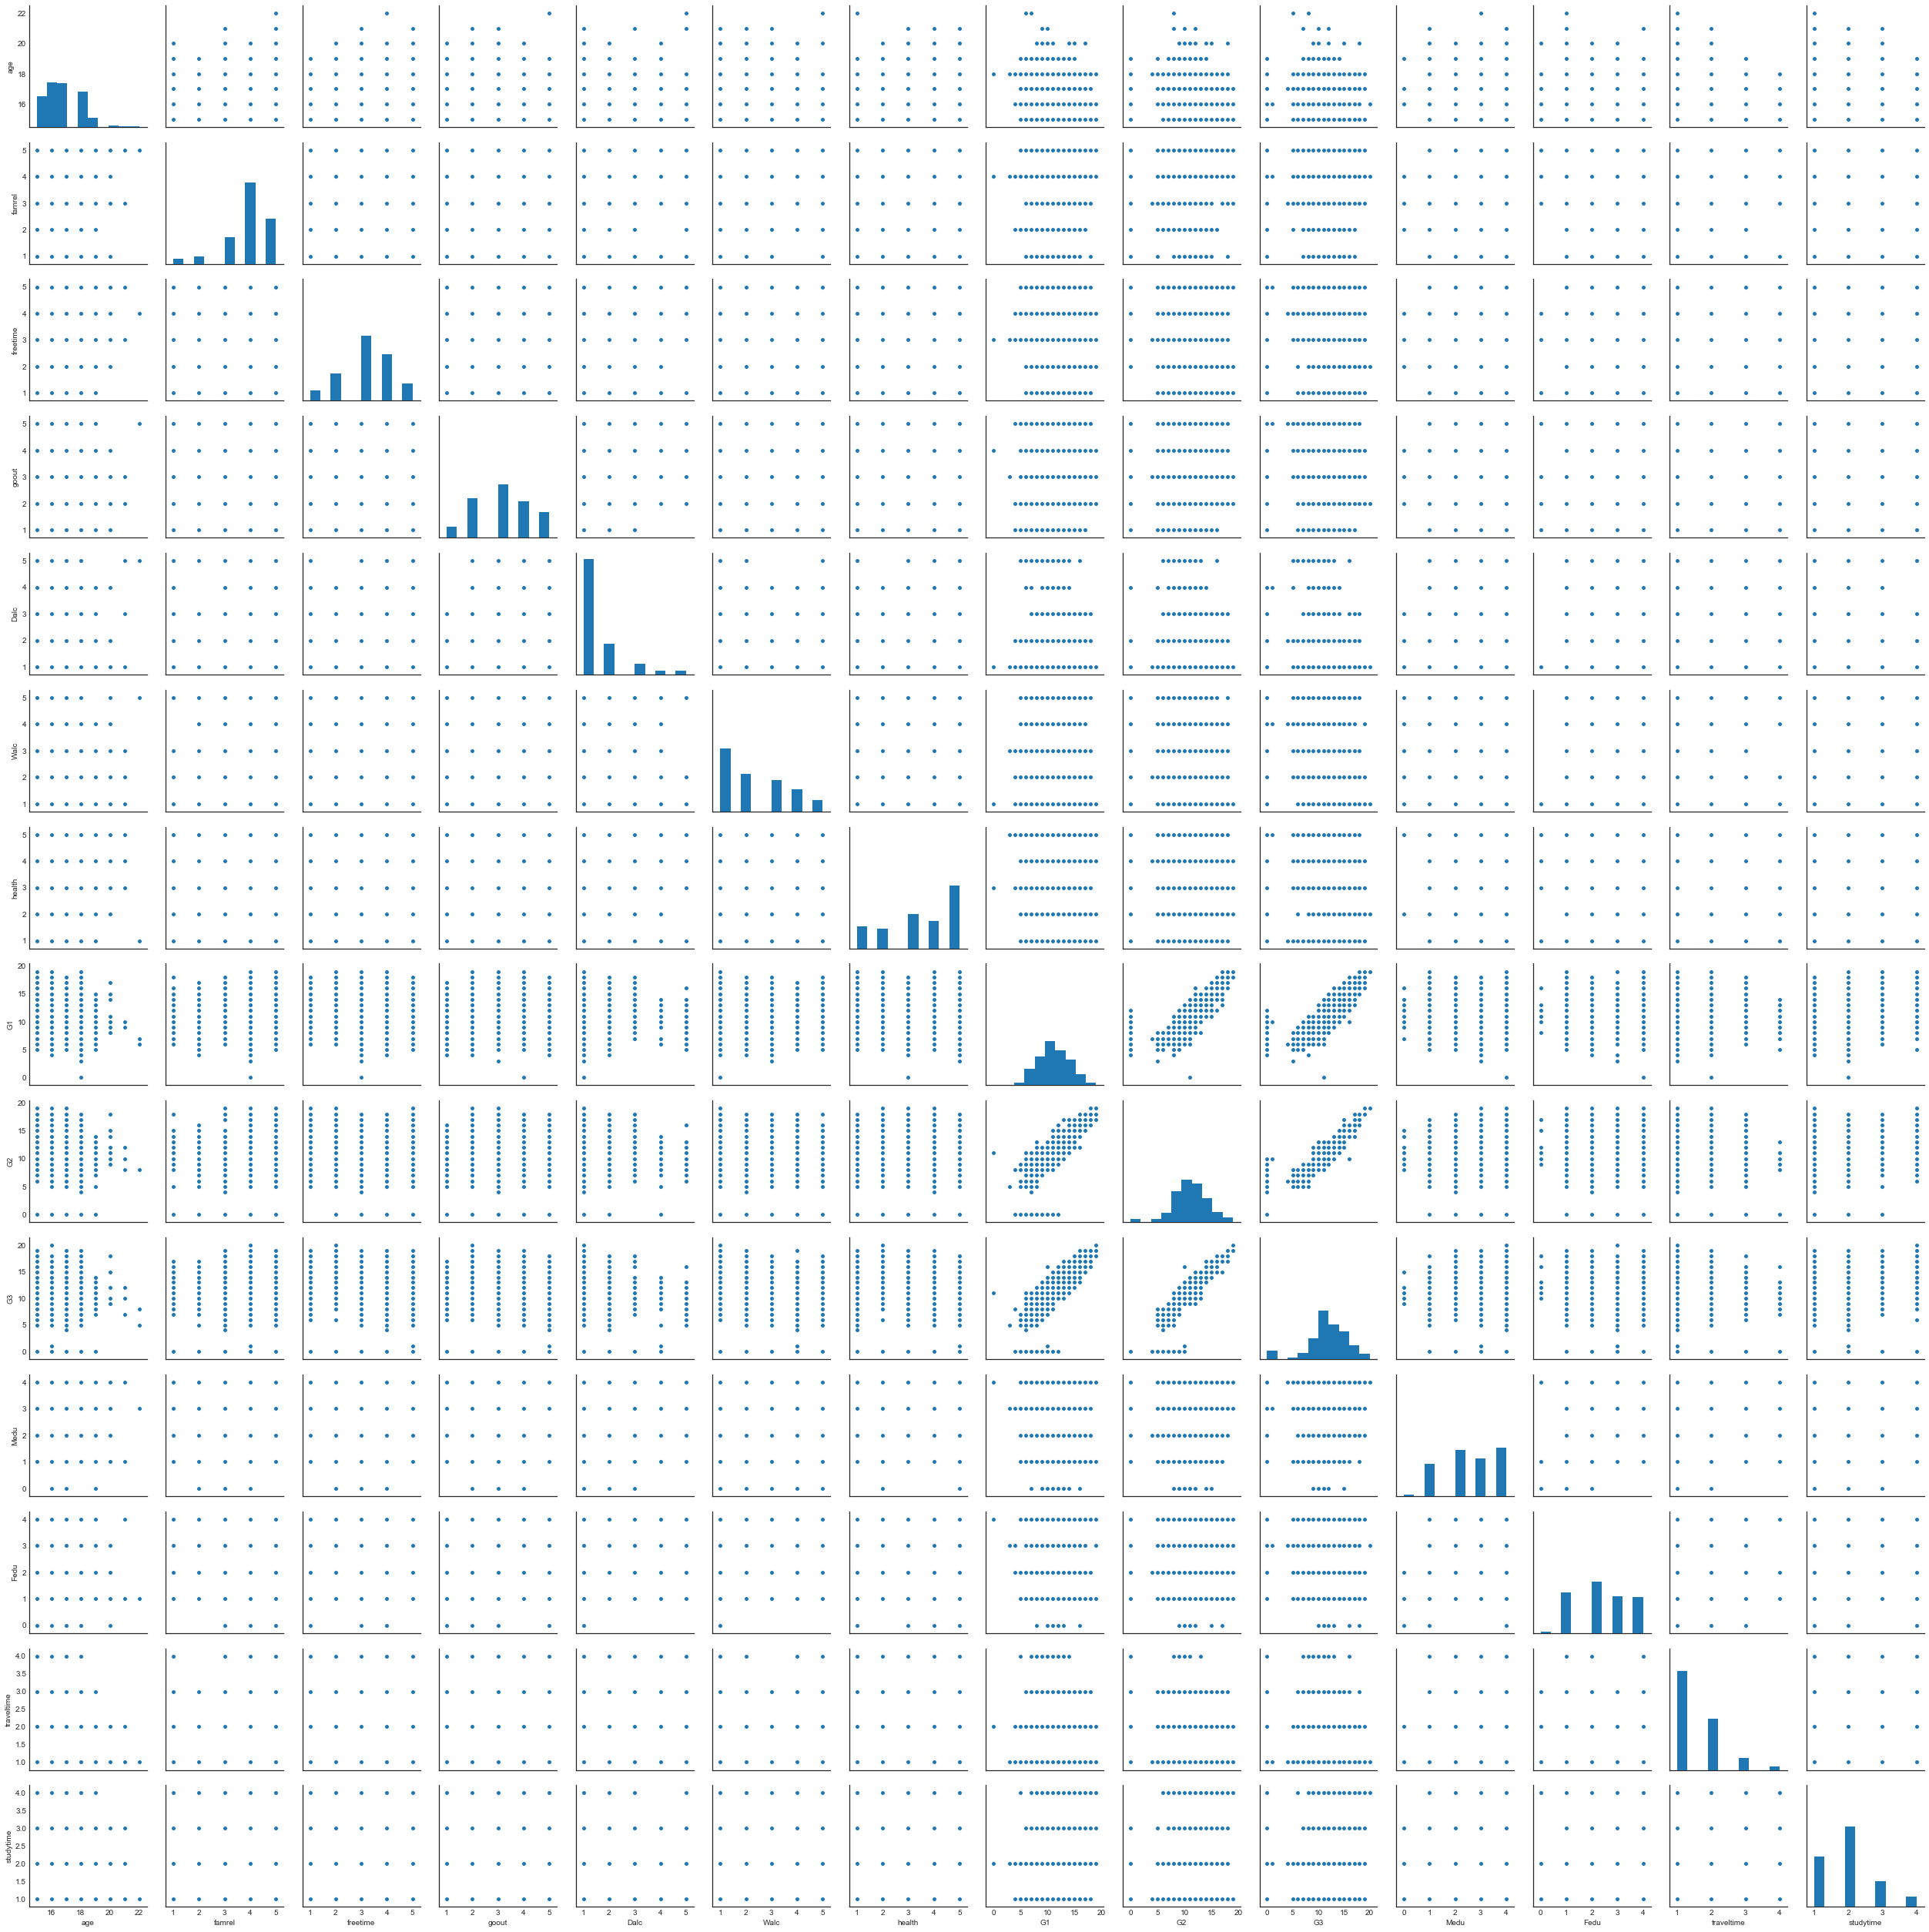

In [6]:
sns.pairplot(continuous_data)

In [7]:

exclude = ['Walc']

y = continuous_data.Walc
X = continuous_data.ix[:, continuous_data.columns.difference(exclude)]

c:\users\david\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [12]:
# Initialize and train our tree
from sklearn.cross_validation import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=8,
    min_samples_leaf=3,
    random_state = 1337
)

decision_tree.fit(X, y)
y_1_predictions = decision_tree.predict(X)


print("\nAccuracy on training set: {:.3f}".format(decision_tree.score(X, Y)))
print("\nAccuracy on test set: {:.3f}".format(decision_tree.score(X, Y)))


# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

NameError: name 'Y' is not defined

In [9]:

start_time  = time.time()
dt = tree.DecisionTreeClassifier(random_state=0,max_depth=3)
cvscore = cross_val_score(dt, X_train, y_train, cv=10)
print("Decision Tree takes %s seconds" % (time.time() - start_time))

Decision Tree takes 0.05385637283325195 seconds


## Random Forest

In [10]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(
    n_estimators=15,
    criterion='entropy',
    max_features=3,
    max_depth=9
)


rfc.fit(X_train, y_train)
y_1_predictions = rfc.predict(X_test)


print("\nAccuracy of training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("\nAccuracy of test set: {:.3f}".format(rfc.score(X_test, y_test)))



Accuracy of training set: 0.922

Accuracy of test set: 0.609


In [11]:
start_time = time.time()
rfc = ensemble.RandomForestClassifier()


cv_score = cross_val_score(rfc, X_train, y_train, cv=10)
print("Random Forest takes %s seconds" % (time.time() - start_time))

Random Forest takes 0.2951366901397705 seconds


The above shows that the Random Forest is much more accurate than the decision tree in predicting the weekly alcohol consumption of students